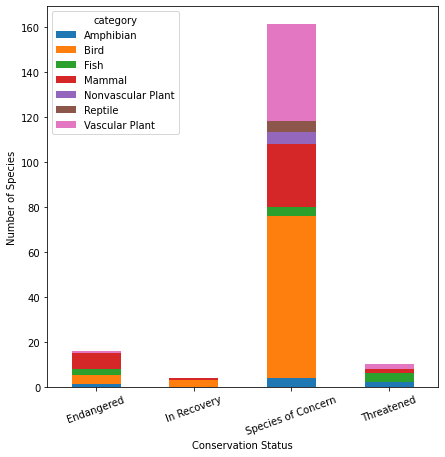

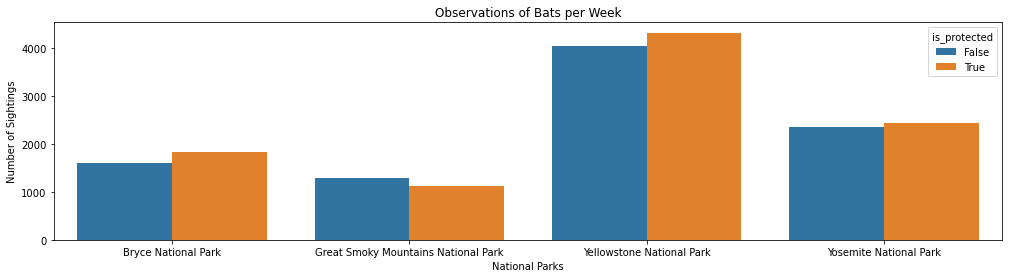

"Conclusions - Most species aren't marked for conservation. Mammals and Birds have the highest percentage of being \nmarked for conservation. While mammals and birds have no significant difference in conservation percentage, the difference\nbetween mammals and reptiles is statistically significant. Out of all the animals in this study, bats were the most common,\nand they were most likely to be found in Yellowstone National Park.\n\nIt would be enlightening to see this data spread out over more than a seven-day observational period, to track conservation\nstatus for species over time. Also knowing how big each park is would put the data of how many animals are seen in each\npark in a different light."

In [66]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from itertools import chain
import string



species = pd.read_csv('species_info.csv')
obs=pd.read_csv('observations.csv')

#print(species.info())
#print(obs.info())
species.fillna('No Intervention', inplace=True)

animals = obs.join(species.set_index('scientific_name'), on='scientific_name')



conservation_category = species[species.conservation_status != 'No Intervention']\
    .groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()

ax1 = conservation_category.plot(kind = 'bar', figsize = (7,7),  stacked = True)
ax1.set_xlabel("Conservation Status")
ax1.set_ylabel("Number of Species")
plt.xticks(rotation=20)
plt.savefig('conservation_status.png')
plt.show()


animals['is_protected'] = animals.conservation_status != 'No Intervention'

category_counts = animals.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()\
    .pivot(columns = 'is_protected', index='category', values='scientific_name').reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

category_counts['percent_protected'] = category_counts.protected/(category_counts.protected + category_counts.not_protected) * 100
category_counts

#Mammal & Bird
contingency1  = [[30, 146], [75, 413]]
chi2_contingency(contingency1)

#Mammal & Reptile
contingency2 = [[30, 146], [5, 73]]
chi2_contingency(contingency2)



def no_punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_names = species[species.category == 'Mammal'].common_names.apply(no_punctuation).str.split().tolist()

cleaned_rows = []
for i in common_names:
    i = list(dict.fromkeys(i))
    cleaned_rows.append(i)


words = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleaned_rows))

word_count = []
for i in words:
    x=words.count(i)
    word_count.append((i,x))

animals['is_bat'] = animals.common_names.str.contains(r'\bBat\b', regex=True)
bat = animals[animals.is_bat]

obs_by_park = bat.groupby(['park_name', 'is_protected']).observations.sum().reset_index()


plt.figure(figsize = (17,4))
sns.barplot(x=obs_by_park.park_name, y=obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Sightings')
plt.title('Observations of Bats per Week')
plt.savefig('Bats_week.png')
plt.show()



"""Conclusions - Most species aren't marked for conservation. Mammals and Birds have the highest percentage of being 
marked for conservation. While mammals and birds have no significant difference in conservation percentage, the difference
between mammals and reptiles is statistically significant. Out of all the animals in this study, bats were the most common,
and they were most likely to be found in Yellowstone National Park.

It would be enlightening to see this data spread out over more than a seven-day observational period, to track conservation
status for species over time. Also knowing how big each park is would put the data of how many animals are seen in each
park in a different light."""